# Notebook of Adoption Funnel through Marketing Signal
### Prepared by Matt Barlin, Lead Systems Engineer, BlockScience

The purpose of this notebook explores the adoption funnel using a Finite State Machine model. Targeted members are treated as sub-population pools as they move through states of adoption, using a developed Aoption_Pool class object. 

In [1]:
from typing import Dict, List

In [2]:
g: Dict[str, List[int]] = {
    'alpha': [1],
    'beta': [2, 5],
    'gamma': [3, 4],
    'omega': [9]
}

In [3]:
g

{'alpha': [1], 'beta': [2, 5], 'gamma': [3, 4], 'omega': [9]}

In [4]:
g: Dict[str, List[int]] = g

In [5]:
# For displaying image files
from IPython.display import Image

## Finite State Machine Diagram

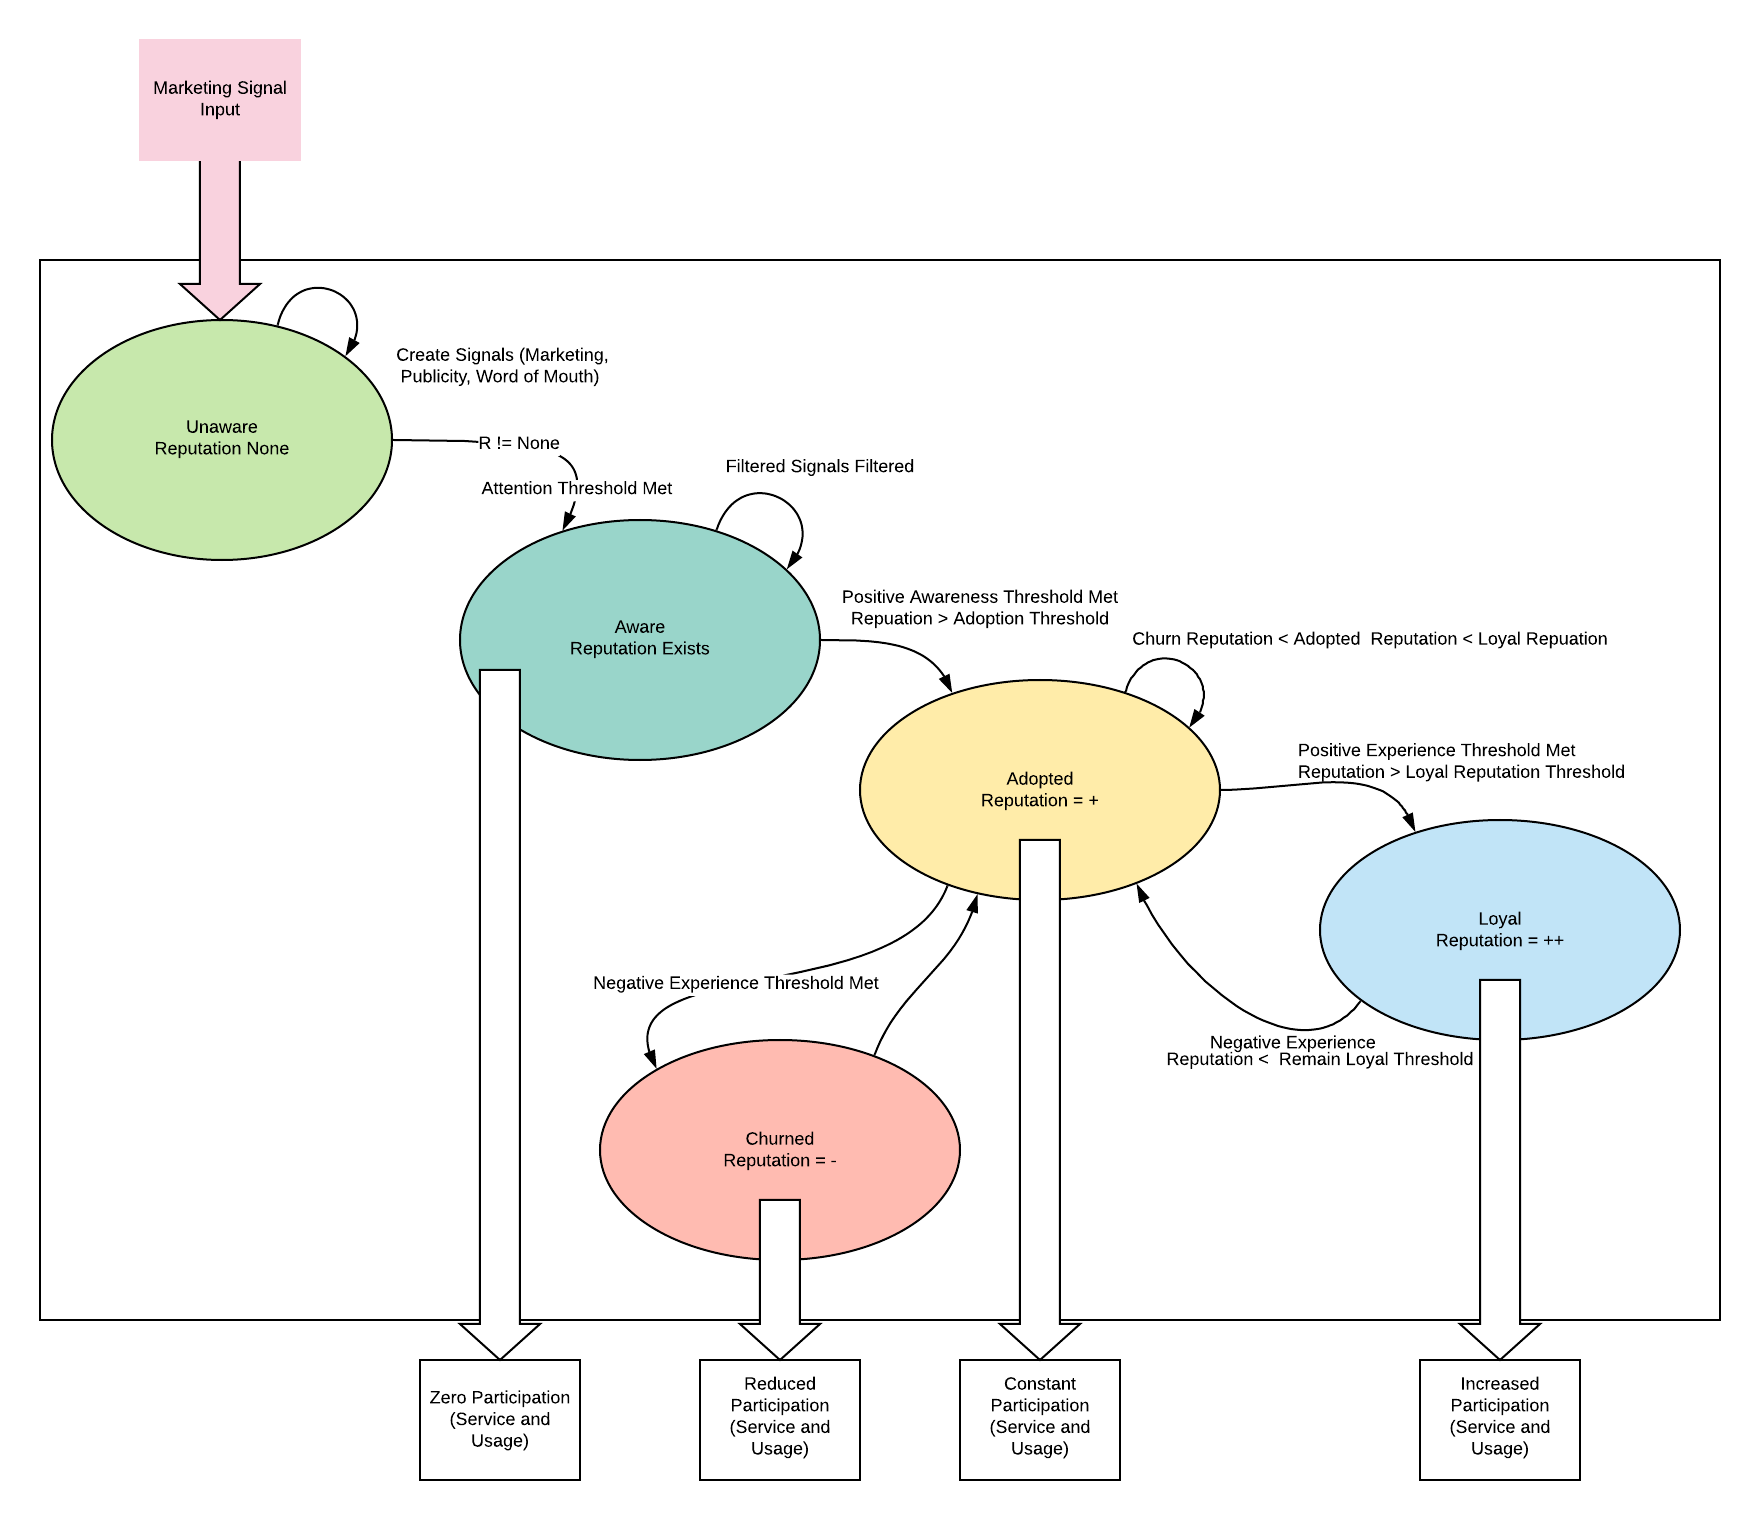

In [6]:
Image(filename='images/state_machine.png')

### State Transition Table

| Current State    |  Input | Next State     |  Threshold | Output Reputation  |Output Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|:-----:|
|Unaware |Marketing Signal     |Unaware    | Not Exceeded | Empty $\emptyset$      |None      |
|Unaware |Marketing Signal     |Aware    | Exceeded | Exists $\exists$     | None      |
|Aware    | Reputation    |Aware    | Not Exceeded | Exists $\exists$       |None      |
|Aware    | Reputation    |Adopted    | Exceeded | Positive (+)     |None      |
|Adopted    | Experience    |Adopted    | Not Exceeded | Positive (+)      |Some      |
|Adopted    | Experience    |Loyal    | Exceeded | Positive  (+)      |Increased      |
|Adopted    | Experience    |Churned    | Lower Limit Exceeded | Negative  (-)    | Decreased      |
|Loyal    | Experience    |Loyal    | Exceeded | Positive (++)     | Increased      |
|Loyal    | Experience    |Adopted    | Lower Limit Exceeded | Positive (+)      | Decreased      |
|Churned    | Reputation    |Churned    | Lower Limit Exceeded | Negative (-)      | None      |
|Churned    | Reputation    |Adopted    |  Exceeded | Positive (+)      | None     |


### Differential Update Equations
#### Drip Function

$$ \Delta{V} = \delta \cdot (V_C \times \mu_C -  V_C  \times \mu_{\tau}) $$

#### Current State

$$ V_C = V_C - \Delta{V} $$

$$ \mu_C =\frac{ V_C \cdot \mu_C - \delta \cdot \mu_C  \cdot \Delta{V}}{V_C - \Delta{V}}$$

#### Next State

$$ V_N = V_N + \Delta{V} $$

$$ \mu_N = \frac{V_N \cdot \mu_N + \delta \cdot \mu_C \cdot \Delta{V}}{V_N + \Delta{V}}$$

Where:

1. $ \Delta{V}$ is the volume or count of pool members transitioning to the next state of adoption
1. $V_C$ is the volume or count of pool members for each current state of adoption, C
2. $\delta$ is the leak coefficient, available as a parameter choice
3. $\mu_C$ is the mean reputation for each current state of adoption, C
3. $\mu_{\tau}$ is the mean threshold reputation for each state of adoption
1. $V_N$ is the volume or count of pool members in the next state of adoption, N

### Import Model Configuration Object

#### Import Python Libraries for Analysis and Plotting

#### Output is the configuration dictionary containing

'N' = Number of Monte Carlo Runs, running multiple simulations of the same system.

'T' = Computer simulations run in discrete time. The length of the simulation in timesteps.

'M' = Dictionary of system parameter values being tested. Any parameter listed in the M dictionary may be swept over a range of values.

In [7]:
# Import configuration
from src.sim import run

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

Configurations Length: 1
Execution Method: local_simulations
Execution Mode: single_threaded
{'pool': 100000, 'reputation': None}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 100000, 'reputation': 1, 'drip': 9.99}, 'aware': {'pool': 0, 'reputation': 0, 'neg_drip': -0.0}, 'adopted': {'pool': 0, 'reputation': 0, 'neg_drip': -0.0}, 'loyal': {'pool': 0, 'reputation': 0, 'neg_drip': -0.0}, 'churned': {'pool': 0, 'reputation': 0, 'neg_drip': -0.0}}, 'threshold': 0.001}
unaware
triggered 2
aware
adopted
neg drip adopted -0.0
loyal
neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 99990.01, 'reputation': 1.000099899990009, 'drip': 0}, 'aware': {'pool': 9.99, 'reputation': 0.0001, 'neg_drip': -0.0}, 'adopted': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': -0.0}}, 'threshold': 0.001}
{'pool': 99990.

triggered 2
aware
adopted
neg drip adopted 1.1039800052551031e-07
loyal
neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 44915.598298359546, 'reputation': 198.41080198442452, 'drip': 0}, 'aware': {'pool': 55083.24986518642, 'reputation': 0.009839164785752086, 'neg_drip': 3.1523646145950494e-06, 'drip': 0}, 'adopted': {'pool': 1.151834214055398, 'reputation': 7.434102162393466e-07, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 2.2399706467937903e-06, 'reputation': -3.7080151406242257e-09, 'neg_drip': 2.129580384441289e-13}}, 'threshold': 0.001}
{'pool': 44915.598298359546, 'reputation': 198.41080198442452, 'drip': 0}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 44915.598298359546, 'reputation': 199.41080198442452, 'drip': 895.6610562687833}, 'aware': {'pool': 55083.24986518642, 'reputation': 0.009839164785752086, 'neg_drip': 3.1523646145950494e-06, 'drip': 

{'pool': -412.9656938191987, 'reputation': -24144.745917789194, 'drip': 0, 'neg_drip': -997.0952162993774}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -24143.745917789194, 'drip': 0, 'neg_drip': -997.0539197299956}, 'aware': {'pool': 100372.47609909836, 'reputation': 0.05874481118904319, 'neg_drip': 3.1523646145950494e-06, 'drip': 0.5795989680919186}, 'adopted': {'pool': 40.48944301897639, 'reputation': 5.187458933291839e-06, 'neg_drip': 4.0279405696083595e-06}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': -0.0}, 'churned': {'pool': 0.00015170184680319665, 'reputation': -3.463262567333938e-08, 'neg_drip': 1.5170710063647096e-11}}, 'threshold': 0.001}
unaware
triggered 2
aware
adopted
neg drip adopted 4.0279405696083595e-06
loyal
neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -24143.745917789194, 'drip': 0, 'neg_drip': -997.0

neg drip adopted 1.0250782479127134e-05
loyal
neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -24035.745917789154, 'drip': 0, 'neg_drip': -992.5938902367466}, 'aware': {'pool': 100309.29947242771, 'reputation': 0.058781806041755626, 'neg_drip': 3.1523646145950494e-06, 'drip': 0}, 'adopted': {'pool': 103.66529149903451, 'reputation': 5.607264552664567e-06, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.000929892459440807, 'reputation': -9.41782293224311e-08, 'neg_drip': 9.197277715190097e-11}}, 'threshold': 0.001}
{'pool': -412.9656938191987, 'reputation': -24035.745917789154, 'drip': 0, 'neg_drip': -992.5938902367466}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -24034.745917789154, 'drip': 0, 'neg_drip': -992.5525936673647}, 'aware': {'pool': 100309.29947242771, 'reputation': 0.05878180

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23952.74591778913, 'drip': 0, 'neg_drip': -989.1662749780462}, 'aware': {'pool': 100261.1920407108, 'reputation': 0.05881000796925737, 'neg_drip': 3.1523646145950494e-06, 'drip': 0}, 'adopted': {'pool': 151.77167154203465, 'reputation': 5.69357861182429e-06, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0019815663521126734, 'reputation': -1.411255950110729e-07, 'neg_drip': 1.9668096244977278e-10}}, 'threshold': 0.001}
{'pool': -412.9656938191987, 'reputation': -23952.74591778913, 'drip': 0, 'neg_drip': -989.1662749780462}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23951.74591778913, 'drip': 0, 'neg_drip': -989.1249784086643}, 'aware': {'pool': 100261.1920407108, 'reputation': 0.05881000796925737, 'neg_drip': 3.1523646145950494e-06, 'drip': 0.5796100310880735}, 'a

neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23859.74591778911, 'drip': 0, 'neg_drip': -985.3256940255268}, 'aware': {'pool': 100207.28806132019, 'reputation': 0.05884164016313463, 'neg_drip': 3.1523646145950494e-06, 'drip': 0}, 'adopted': {'pool': 205.67400100019512, 'reputation': 5.743108826056733e-06, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.003631498804962898, 'reputation': -1.9433118320548953e-07, 'neg_drip': 3.611806820958357e-10}}, 'threshold': 0.001}
{'pool': -412.9656938191987, 'reputation': -23859.74591778911, 'drip': 0, 'neg_drip': -985.3256940255268}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23858.74591778911, 'drip': 0, 'neg_drip': -985.2843974561449}, 'aware': {'pool': 100207.28806132019, 'reputation': 0.05884164016313463, 'neg_drip': 3.1523646145950494e-06, '

unaware
triggered 2
aware
adopted
neg drip adopted 2.5750168478483754e-05
loyal
neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23766.74591778908, 'drip': 0, 'neg_drip': -981.485113073007}, 'aware': {'pool': 100153.38358357007, 'reputation': 0.05887330669802612, 'neg_drip': 3.1523646145950494e-06, 'drip': 0}, 'adopted': {'pool': 259.57633047589115, 'reputation': 5.7727258794086885e-06, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.005779773253907791, 'reputation': -2.478913898946102e-07, 'neg_drip': 5.755446136569643e-10}}, 'threshold': 0.001}
{'pool': -412.9656938191987, 'reputation': -23766.74591778908, 'drip': 0, 'neg_drip': -981.485113073007}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23765.74591778908, 'drip': 0, 'neg_drip': -981.4438165036253}, 'aware': {'pool': 100153.3835835

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23662.74591778905, 'drip': 0, 'neg_drip': -977.1902698572861}, 'aware': {'pool': 100093.10271710846, 'reputation': 0.05890875947992306, 'neg_drip': 3.1523646145950494e-06, 'drip': 0}, 'adopted': {'pool': 319.85420432461615, 'reputation': 5.794655392695899e-06, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.008772386154414108, 'reputation': -3.0805015337441353e-07, 'neg_drip': 8.743331188263721e-10}}, 'threshold': 0.001}
{'pool': -412.9656938191987, 'reputation': -23662.74591778905, 'drip': 0, 'neg_drip': -977.1902698572861}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23661.74591778905, 'drip': 0, 'neg_drip': -977.1489732879041}, 'aware': {'pool': 100093.10271710846, 'reputation': 0.05890875947992306, 'neg_drip': 3.1523646145950494e-06, 'drip': 0.5796267410844267}, 

neg drip adopted 3.733140084015203e-05
loyal
neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23565.74591778902, 'drip': 0, 'neg_drip': -973.1845026272387}, 'aware': {'pool': 100036.8786549383, 'reputation': 0.05894186485564878, 'neg_drip': 3.1523646145950494e-06, 'drip': 0}, 'adopted': {'pool': 376.07491361800373, 'reputation': 5.809285384589024e-06, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.012125262924228, 'reputation': -3.6433339076010423e-07, 'neg_drip': 1.2092328538242647e-09}}, 'threshold': 0.001}
{'pool': -412.9656938191987, 'reputation': -23565.74591778902, 'drip': 0, 'neg_drip': -973.1845026272387}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23564.74591778902, 'drip': 0, 'neg_drip': -973.1432060578567}, 'aware': {'pool': 100036.8786549383, 'reputation': 0.058941864855648

{'pool': -412.9656938191987, 'reputation': -23469.745917788994, 'drip': 0, 'neg_drip': -969.2200319665733}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23468.745917788994, 'drip': 0, 'neg_drip': -969.1787353971914}, 'aware': {'pool': 99981.23368846871, 'reputation': 0.05897466591141154, 'neg_drip': 3.1523646145950494e-06, 'drip': 0.5796378620499738}, 'adopted': {'pool': 431.7160280045878, 'reputation': 5.820437597373594e-06, 'neg_drip': 4.2920325180380116e-05}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': -0.0}, 'churned': {'pool': 0.015977345923793507, 'reputation': -4.2015871707721407e-07, 'neg_drip': 1.598405894495915e-09}}, 'threshold': 0.001}
unaware
triggered 2
aware
adopted
neg drip adopted 4.2920325180380116e-05
loyal
neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23468.745917788994, 'drip': 0, 'neg_drip': -969.1787

aware
adopted
neg drip adopted 4.6665470236519544e-05
loyal
neg drip loyal -0.0
churned
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23403.745917788965, 'drip': 0, 'neg_drip': -966.4944583873654}, 'aware': {'pool': 99942.97746597418, 'reputation': 0.058997238005424904, 'neg_drip': 3.1523646145950494e-06, 'drip': 0}, 'adopted': {'pool': 469.96929416783917, 'reputation': 5.8267983212059705e-06, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.018933677217897335, 'reputation': -4.585954020313704e-07, 'neg_drip': 1.889566223932557e-09}}, 'threshold': 0.001}
{'pool': -412.9656938191987, 'reputation': -23403.745917788965, 'drip': 0, 'neg_drip': -966.4944583873654}
<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': -412.9656938191987, 'reputation': -23402.745917788965, 'drip': 0, 'neg_drip': -966.4531618179834}, 'aware': {'pool': 99942.97746597418, 'reputatio

### cadCAD Specification
A Partial State Update Block (PSUB) is a set of State Update Functions and Policy Functions such that State Update Functions in the set are independent from each other and Policies in the set are independent from each other and from the State Update Functions in the set. In other words, if a state variable is updated in a PSUB, its new value cannot impact the State Update Functions and Policy Functions in that PSUB - only those in the next PSUB. The partial state update block for the Adoption Funnel is implemented according to the specification below.

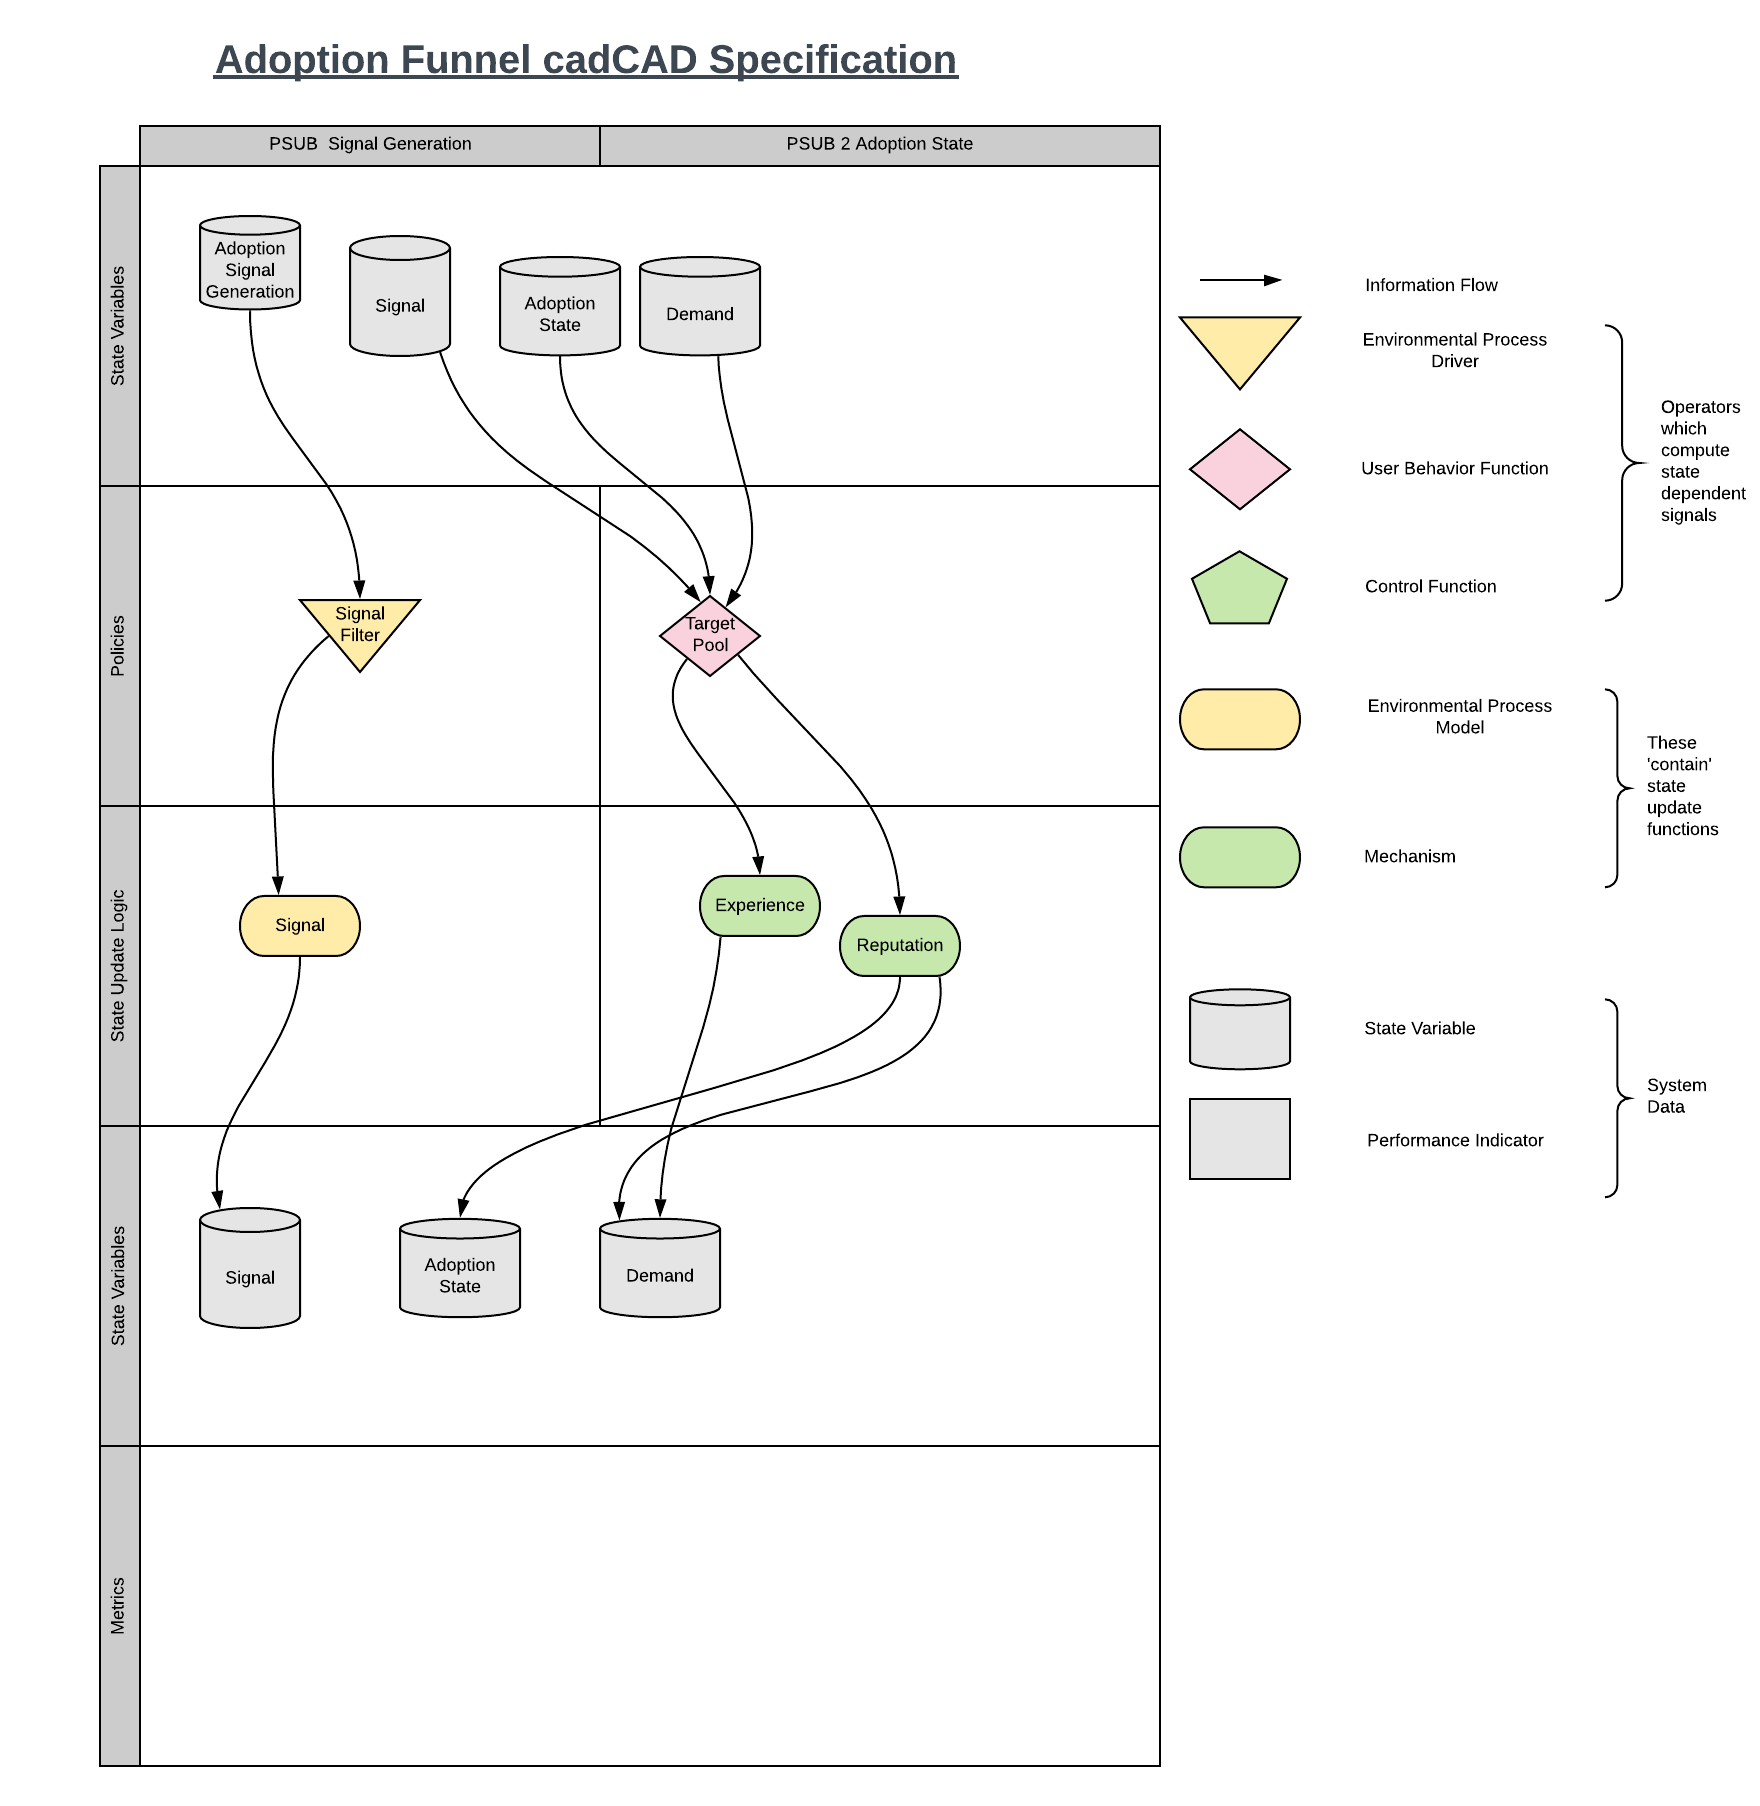

In [8]:
Image(filename='images/adoption_cadcad_spec.png')

### Run cadCAD Simulation
A Simulation execution produces a System Event Dataset and the Tensor Field applied to initial states used to create it.
Execute Simulation to produce the System Event Dataset, labeled "experiments"

In [9]:
experiments = run.run()

### View Head of First Experiment Results

In [11]:
print(experiments.head())

   timestamp  signal                                               pool  \
0 2020-01-01       0  <class 'src.sim.model.utils.Adoption_Pool'>: {...   
1 2020-01-01     500  <class 'src.sim.model.utils.Adoption_Pool'>: {...   
2 2020-01-01     500  <class 'src.sim.model.utils.Adoption_Pool'>: {...   
3 2020-01-01     500  <class 'src.sim.model.utils.Adoption_Pool'>: {...   
4 2020-01-01     500  <class 'src.sim.model.utils.Adoption_Pool'>: {...   

   simulation  run  substep  timestep  
0           0    1        0         0  
1           0    1        1         1  
2           0    1        2         1  
3           0    1        1         2  
4           0    1        2         2  


Collect some keys for investigation at selected timesteps.

In [13]:
first_experiment = experiments

In [20]:
experiments

,timestamp,signal,pool,simulation,run,substep,timestep
0,2020-01-01,0,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,0,0
1,2020-01-01,500,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,1,1
2,2020-01-01,500,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,2,1
3,2020-01-01,500,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,1,2
4,2020-01-01,500,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,2,2
...,...,...,...,...,...,...,...
1996,2020-01-01,500,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,2,998
1997,2020-01-01,500,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,1,999
1998,2020-01-01,500,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,2,999
1999,2020-01-01,500,<class 'src.sim.model.utils.Adoption_Pool'>: {...,0,1,1,1000


In [14]:
print(first_experiment.pool[0])

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 100000, 'reputation': None}, 'aware': {'pool': 0, 'reputation': 0}, 'adopted': {'pool': 0, 'reputation': 0}, 'loyal': {'pool': 0, 'reputation': 0}, 'churned': {'pool': 0, 'reputation': 0}}, 'threshold': 0.5}


In [15]:
print(first_experiment.pool[2])

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 99990.01, 'reputation': 1.000099899990009, 'drip': 0}, 'aware': {'pool': 9.99, 'reputation': 0.0001, 'neg_drip': -0.0}, 'adopted': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': -0.0}}, 'threshold': 0.001}


In [16]:
print(first_experiment.pool[4])

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 99970.0209981009, 'reputation': 2.0004997798970066, 'drip': 0}, 'aware': {'pool': 29.979001899100005, 'reputation': 0.0001666833367817698, 'neg_drip': 8.991000000000001e-07}, 'adopted': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': 0}, 'loyal': {'pool': 0.0, 'reputation': 0, 'neg_drip': 0}, 'churned': {'pool': 0.0, 'reputation': 0.0, 'neg_drip': -0.0}}, 'threshold': 0.001}


## Input Driving Signal
 This signal consists of a steady, constant component MARKETING_STEADY and a noisy influx of marketing spend, where magnitude and frequency can be governed through, MARKETING_SHOCK_MAG and MARKETING_SHOCK_FREQ, respectively.

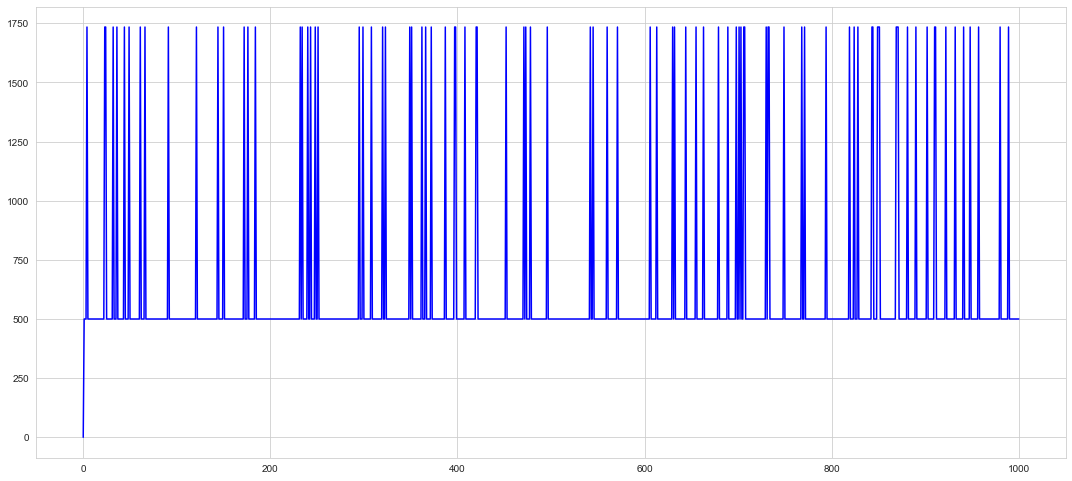

In [23]:
# experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)
df = experiments
cols = 1
rows = 1
cc_idx = 0

# while cc_idx<len(experiments):
#     cc = experiments.iloc[cc_idx]['SOURCE_POOL']
#     cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
# #     secondary_label = experiments.iloc[cc_idx]['route_allocation']
#     sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
#     cc_idx += len(sub_experiments)
fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
#     sub_experiments.reset_index(drop=False)
#     for i, experiment in sub_experiments.iterrows():
#         df = experiment['dataset'].copy()

#         plot_label = experiment['SOURCE_POOL']
#         ax = axs
#         title = 'Marketing Spend' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
#         ax.set_title(title)
#         ax.set_ylabel('Dollars Spent ($)')
colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
ax.plot(df.timestep, df['signal'],color = colors[0], label='Signal')



#         ax.legend()

#         ax.set_xlabel('Timesteps')
#         ax.grid(color='0.9', linestyle='-', linewidth=1)

#         plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

## Pool Volume through Adoption
The positive driving signal, coupled with positive repuation signal, drives the pool toward loyal adoption.

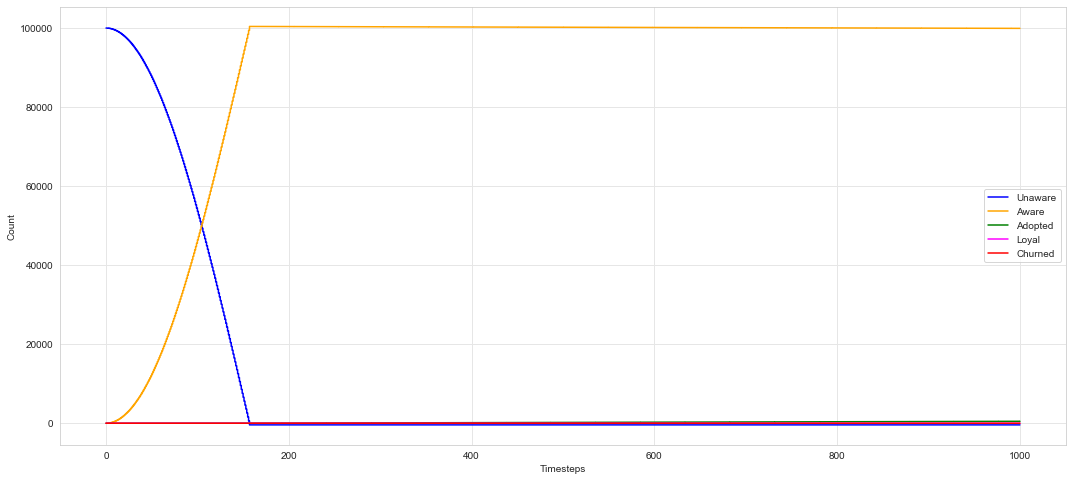

In [25]:
# experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
df = experiments.copy()

# while cc_idx<len(experiments):
#     cc = experiments.iloc[cc_idx]['SOURCE_POOL']
#     cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
# #     secondary_label = experiments.iloc[cc_idx]['route_allocation']
#     sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
#     cc_idx += len(sub_experiments)
fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
#     sub_experiments.reset_index(drop=False)
#     for i, experiment in sub_experiments.iterrows():
#         df = experiment['dataset'].copy()

df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['pool']))
df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['pool']))
df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['pool']))
df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['pool']))
df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['pool']))



#         plot_label = experiment['SOURCE_POOL']
#         ax = axs
#         title = 'Members by Pool' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
#         ax.set_title(title)
ax.set_ylabel('Count')
colors = ['b','orange', 'g', 'magenta', 'r']

ax.plot(df.timestep, df['unaware'],color = colors[0], label='Unaware')
ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')


ax.legend()

ax.set_xlabel('Timesteps')
ax.grid(color='0.9', linestyle='-', linewidth=1)

plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

## Repuation Signal at each state of adoption
The mean repuation internal signal of the pool at each adoption state.

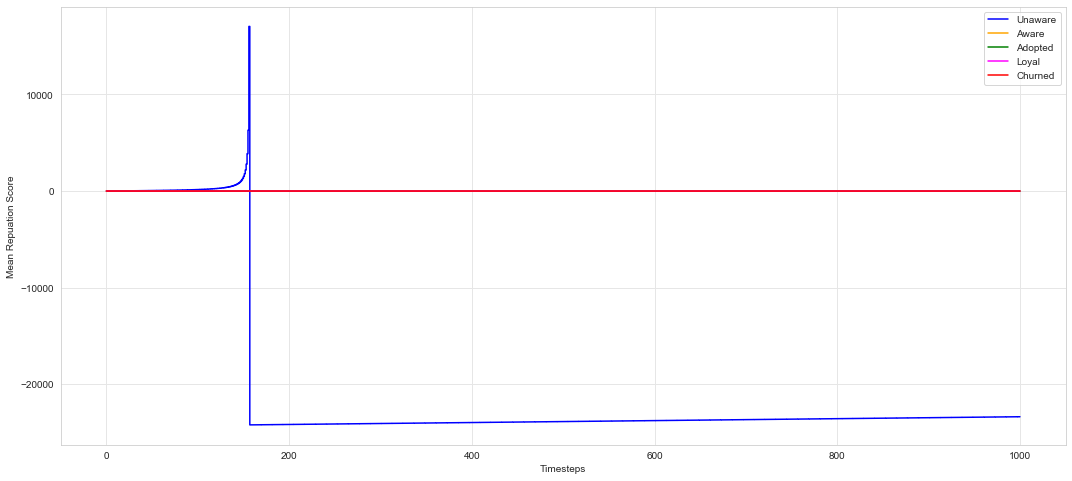

In [26]:
# experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)
df = experiments.copy()

cols = 1
rows = 1
cc_idx = 0

# while cc_idx<len(experiments):
#     cc = experiments.iloc[cc_idx]['SOURCE_POOL']
#     cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
# #     secondary_label = experiments.iloc[cc_idx]['route_allocation']
#     sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
#     cc_idx += len(sub_experiments)
fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
#     sub_experiments.reset_index(drop=False)
#     for i, experiment in sub_experiments.iterrows():
#         df = experiment['dataset'].copy()
        
df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['reputation']))
df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['reputation']))
df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['reputation']))
df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['reputation']))
df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['reputation']))


#         df = df.groupby('timestep').agg({'churned': ['min', 'mean', 'max']}).reset_index()

#         plot_label = experiment['SOURCE_POOL']
#         ax = axs
#         title = 'Reputation by Pool' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
#         ax.set_title(title)
ax.set_ylabel('Mean Repuation Score')
colors = ['b','orange', 'g', 'magenta', 'r']

ax.plot(df.timestep, df['unaware'],color = colors[0], label='Unaware')
ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')

ax.legend()

ax.set_xlabel('Timesteps')
ax.grid(color='0.9', linestyle='-', linewidth=1)

plt.tight_layout()

fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

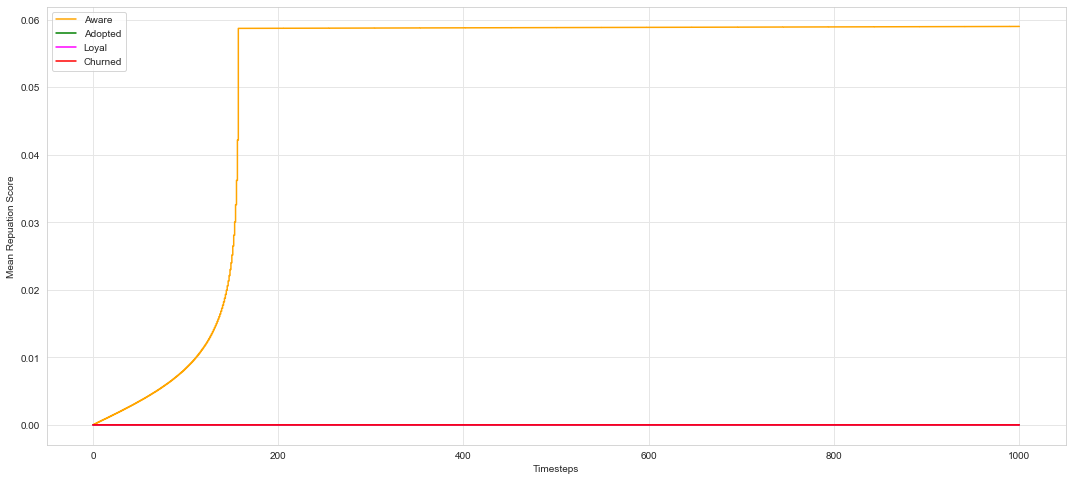

In [35]:
# experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)
df = experiments.copy()

cols = 1
rows = 1
cc_idx = 0

# while cc_idx<len(experiments):
#     cc = experiments.iloc[cc_idx]['SOURCE_POOL']
#     cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
# #     secondary_label = experiments.iloc[cc_idx]['route_allocation']
#     sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
#     cc_idx += len(sub_experiments)
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
#     sub_experiments.reset_index(drop=False)
#     for i, experiment in sub_experiments.iterrows():
#         df = experiment['dataset'].copy()
        
df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['reputation']))
df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['reputation']))
df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['reputation']))
df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['reputation']))
df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['reputation']))


#         df = df.groupby('timestep').agg({'churned': ['min', 'mean', 'max']}).reset_index()

# plot_label = experiment['SOURCE_POOL']
ax = axs
# title = 'Reputation by Pool' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
# ax.set_title(title)
ax.set_ylabel('Mean Repuation Score')
colors = ['b','orange', 'g', 'magenta', 'r']

#         ax.plot(df.timestep, df['unaware'],color = colors[0], label='Unaware')
ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')

ax.legend()

ax.set_xlabel('Timesteps')
ax.grid(color='0.9', linestyle='-', linewidth=1)

plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

### More to Explore
1. There is no filter from the input driving signal to the unaware internal reputation signal. Or I should say a naive filter where a postive marketing signal results in a unitary uptick in reputation for the unaware pool.
2. The threshold was set globally for this simulation. However, the threshold is available to be set for each state of adoption as well as be updated dynamically throughout the simulation, using the set_threshold method in the Adoption_Pool class. 
2. A separate 'experience' signal can be integrated to the reputation signal to influence and determine the adoption as members move through the adopted, loyal, and churned states.
3. Negative experience signals have not yet tested, but I expect there will be signals where the population could driven towards churned state and others where steady-state flow can be achieved.
4. Experience signals can be incorporated (or estimated) through KPIs if this were part of a larger model.
5. Development for this model to become the driving signal module to be integrated into other model configurations

#### Product Metric

In [37]:
print(df.pool[0])

<class 'src.sim.model.utils.Adoption_Pool'>: {'state': {'unaware': {'pool': 100000, 'reputation': 0}, 'aware': {'pool': 0, 'reputation': 0}, 'adopted': {'pool': 0, 'reputation': 0}, 'loyal': {'pool': 0, 'reputation': 0}, 'churned': {'pool': 0, 'reputation': 0}}, 'threshold': 0.5}


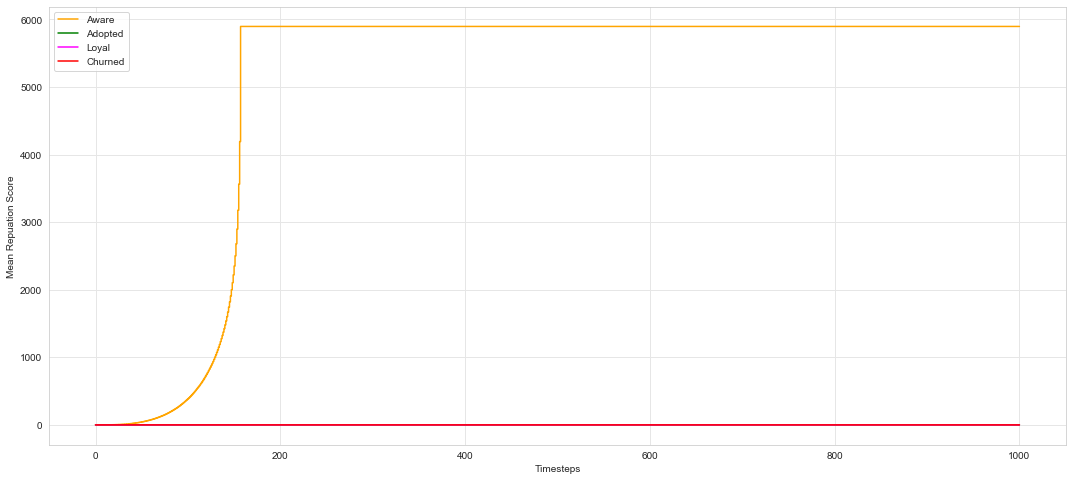

In [39]:
# experiments = experiments.sort_values(by =['SOURCE_POOL']).reset_index(drop=True)
df = experiments.copy()

cols = 1
rows = 1
cc_idx = 0

# while cc_idx<len(experiments):
#     cc = experiments.iloc[cc_idx]['SOURCE_POOL']
#     cc_label = experiments.iloc[cc_idx]['SOURCE_POOL']
# #     secondary_label = experiments.iloc[cc_idx]['route_allocation']
#     sub_experiments = experiments[experiments['SOURCE_POOL']==cc]
#     cc_idx += len(sub_experiments)
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
#     sub_experiments.reset_index(drop=False)
#     for i, experiment in sub_experiments.iterrows():
#         df = experiment['dataset'].copy()
#         # Replace only None with 0
df.pool[0].state['unaware']['reputation'] = 0
#         df.pool.fillna(value = 0, inplace =True)
#         df.pool = df.pool.apply(lambda x: x.state['unaware']['reputation'] = 0 if x.state['unaware']['reputation'] == None else x.state['unaware']['reputation'])
# df['unaware'] = df.pool.apply(lambda x: np.array(x.state['unaware']['reputation'] * x.state['unaware']['pool']))
df['aware'] = df.pool.apply(lambda x: np.array(x.state['aware']['reputation']* x.state['aware']['pool']))
df['adopted'] = df.pool.apply(lambda x: np.array(x.state['adopted']['reputation']* x.state['adopted']['pool']))
df['loyal'] = df.pool.apply(lambda x: np.array(x.state['loyal']['reputation']* x.state['loyal']['pool']))
df['churned'] = df.pool.apply(lambda x: np.array(x.state['churned']['reputation']* x.state['churned']['pool']))


#         df = df.groupby('timestep').agg({'churned': ['min', 'mean', 'max']}).reset_index()

# plot_label = experiment['SOURCE_POOL']
ax = axs
# title = 'Reputation by Pool' + '\n' + 'Scenario: ' + str(cc_label)  + ' SOURCE_POOL'
# ax.set_title(title)
ax.set_ylabel('Mean Repuation Score')
colors = ['b','orange', 'g', 'magenta', 'r']

# ax.plot(df.timestep, df['unaware'],color = colors[0], label='Unaware')
ax.plot(df.timestep, df['aware'],color = colors[1], label='Aware')
ax.plot(df.timestep, df['adopted'],color = colors[2], label='Adopted')
ax.plot(df.timestep, df['loyal'],color = colors[3], label='Loyal')
ax.plot(df.timestep, df['churned'],color = colors[4], label='Churned')

ax.legend()

ax.set_xlabel('Timesteps')
ax.grid(color='0.9', linestyle='-', linewidth=1)

plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()